In [26]:
import sympy as sy
import sympy.abc
import matplotlib.pyplot as plt
import numpy as np
import control as pc

Part of the big question is whether we are simulating the dynamic response, or the steady-state mathematics iterations. Here below is the steady state reponse mathamtical system design, rather than a dynamic diffferential changes with time. Hence, Python's control toolbox cannot solve a steady-state response of a already stable system. However, attempting to perform a fully stable model means that if we want to perform feedback, there's a factor of recalculating stability from that until differential changes become 0 at different time-steps. So for example, if you were to perform feedback after an initial state, you can get a steady state reponse, but this is not the dynamic response, this is solving for the right answer after a number of iterations, and all the initial steady-state answers are wrong for a feedback system. So this gives a steady state response. If we change an input signal also at another point of time, then there is a new steady state response, but the question is whether you want to account for the time dynamics. Because currently, the system is accounting for the digital computing dynamics rather than the actual transient model, so you can't account for how the system dynamically responds and results in a real-time steady-state. So if an input changes in time, you can actually model the time differential change. If we begin considering delays and inputs into the rest of the system, we need to model time as time and computations as computations - and hence we need a time variable input.

There's also the aspect that optics is fundamentally linear and 3D, so how do we account for differential changes in it? What is its dynamic response? There are only dynamic changes on dynamic inputs. What are time changes in optics? You could argue it is near instantaneous. So there's group delay as the time it takes for light to travel through the waveguide, specially if it has been affected in any way. So there is a need to model transient and steady-state responses, but each of these models should be kept separate.

Now, getting a time domain model of a thermo-optic phase shifter response is non-trivial nor necessarily accurate. So, time is a completely new thing in the optical domain for these type of modelled systems. Yes, there is propagation time effects.

Let's consider an MZI, in one arm there's light going over a certain length which incurrs a certain propagation time. Assuming we're only in steady-state mode, when does change occur? You can differtiate phase shift against length for example, but you would be discretizing space-wise. So imagine Pac-Mans moving in a grid of time, according to their position, their properties change, such as phase and this is also dependent in temperature at a given position, but then there must be a differential in temperature and length to calculate a steady state response. So there's this big aspect of time differentials. Could we work based purely on steady-state time differentials? Actually, that could work. There's also the factor of where to add delays, but if we consider every wavelength arm as a system, then we can simply follow the basic principles of control theory.

Hence, the time discretization must occur at a fraction of the time of propagation of the shortest path in the model. 



Let's assume an input to a combiner $E_0(t)$, hence each path signal input becomes $E_1 = E_2 = \frac{E_0}{\sqrt{2}}$.

Beamsplitter Splitter Input at 50/50%
\begin{equation}
\begin{bmatrix} E_{1} \\ E_{2} \end{bmatrix} =
\frac{E_0}{\sqrt{2}}  = \begin{bmatrix} r_{ac}& t_{bc} \\  t_{ad}& r_{bd} \end{bmatrix}\begin{bmatrix} E_0 \\ E_0 \end{bmatrix}  =  \begin{bmatrix} \sqrt{r} &  i\sqrt{1-r} \\  i\sqrt{1-r} &  \sqrt{r}  \end{bmatrix}
\begin{bmatrix} E_0 \\ E_0 \end{bmatrix} 
\end{equation}

Beamsplitter Combiner Output for 50/50

\begin{equation}
E_3 = \frac{E_1 + E_2}{\sqrt{2}} = \frac{1}{\sqrt{2}}  \begin{bmatrix} 1 & 1 \end{bmatrix}
\begin{bmatrix} E_1 \\ E_2 \end{bmatrix} = \begin{bmatrix} \sqrt{r} &  i\sqrt{1-r} \\  0 & 0  \end{bmatrix}
\begin{bmatrix} E_1 \\ E_2 \end{bmatrix} 
\end{equation}

Assuming a phase shifter on top arm
\begin{equation}
\textbf{ $\Phi$ } = \begin{bmatrix} e^{i\phi} & 0 \\ 0 & 1\end{bmatrix}
\end{equation}

Note we're not yet taking into account Linear and LinearGroup delay, or the quantum probability variable within the design of the device.
Also, for us to be able to have a simulateable model, it must be a finite model - ie steady state must be able to be reached.

The standard model of a 1D light electromagnetic wave is:

$$E_0(t, z) = E_0 e^{j (wt - \beta z)}$$

There's the question as well whether a given model can reach this steady state by ignoring the complex propagation constant of the model? Because if it cannot, then there's no point following the rest of the derivation.

For a 1x1 MZI, we can represent this as a Beamsplitter Splitter - Phase shifter on a length - Beamsplitter Combiner

\begin{equation}
E_3 = \begin{bmatrix} \sqrt{r} &  i\sqrt{1-r} \\  0 & 0  \end{bmatrix}
\begin{bmatrix} e^{i\phi} & 0 \\ 0 & 1\end{bmatrix}
\begin{bmatrix} \sqrt{r} &  i\sqrt{1-r} \\  i\sqrt{1-r} &  \sqrt{r}  \end{bmatrix}
\begin{bmatrix} E_0 \\ E_0 \end{bmatrix} 
\end{equation}

In [2]:
t = sy.Symbol("t")
T = sy.Symbol("T")
E_0 = sy.Function("E_0")(t)
n = sy.Function("n")(t,T)

E_0_s = sy.Symbol("E_0")
E_1 = E_2 = E_0 / sy.sqrt(2)
L = sy.Symbol("L")
lambda_0 = sy.Symbol("\lambda_0")
phi = sy.Function("\phi")(t)
r_0, r_1 = sy.symbols("r_0 r_1")

dE_0_s = sy.Symbol("dE_0")
dE_1_s = sy.Symbol("dE_1")
d_phi_d_t_s = sy.Symbol("d\phi")


In [3]:
splitter_beamsplitter  = sy.Matrix([[sy.sqrt(r_0), sy.I*sy.sqrt(1 - r_0)],
				[sy.I*sy.sqrt(1 - r_0), sy.sqrt(r_0)]])
combiner_beamsplitter  = sy.Matrix([[sy.sqrt(r_1), sy.I*sy.sqrt(1 - r_1)],
				[0,0]])
phase_changer = sy.Matrix([[sy.exp(sy.I * phi), 0],
				[0, 1]])
E = sy.Matrix([[E_0], [E_0]])

out = combiner_beamsplitter * phase_changer * splitter_beamsplitter * E
out

Matrix([
[(I*sqrt(r_0)*sqrt(1 - r_1) + I*sqrt(r_1)*sqrt(1 - r_0)*exp(I*\phi(t)))*E_0(t) + (sqrt(r_0)*sqrt(r_1)*exp(I*\phi(t)) - sqrt(1 - r_0)*sqrt(1 - r_1))*E_0(t)],
[                                                                                                                                                        0]])

In [4]:
differential_time_response = out.diff(t)
differential_time_response = differential_time_response.replace(E_0.diff(t), dE_0_s)
differential_time_response

Matrix([
[dE_0*(I*sqrt(r_0)*sqrt(1 - r_1) + I*sqrt(r_1)*sqrt(1 - r_0)*exp(I*\phi(t))) + dE_0*(sqrt(r_0)*sqrt(r_1)*exp(I*\phi(t)) - sqrt(1 - r_0)*sqrt(1 - r_1)) + I*sqrt(r_0)*sqrt(r_1)*E_0(t)*exp(I*\phi(t))*Derivative(\phi(t), t) - sqrt(r_1)*sqrt(1 - r_0)*E_0(t)*exp(I*\phi(t))*Derivative(\phi(t), t)],
[                                                                                                                                                                                                                                                                                                0]])

The problem becomes an equilibrium condition to solve. One could argue that when the output is in equilibrium or in steady state:

\begin{equation}
\begin{bmatrix} \frac{dE_{3}}{dt}  \\ 0 \end{bmatrix}  = 0
\end{equation}

In [5]:
dE_0_d_t = sy.solve(differential_time_response[0], dE_0_s)[0]
dE_0_d_t = dE_0_d_t.replace(E_0, E_0_s)
dE_0_d_t = dE_0_d_t.replace(phi.diff(t), d_phi_d_t_s)
dE_0_d_t

E_0*d\phi*sqrt(r_1)*(-I*sqrt(r_0) + sqrt(1 - r_0))*exp(I*\phi(t))/(sqrt(r_0)*sqrt(r_1)*exp(I*\phi(t)) + I*sqrt(r_0)*sqrt(1 - r_1) + I*sqrt(r_1)*sqrt(1 - r_0)*exp(I*\phi(t)) - sqrt(1 - r_0)*sqrt(1 - r_1))

In [6]:
c = sy.abc.a + sy.abc.b
d = sy.lambdify([sy.abc.a, sy.abc.b], c)
d(3,3)

6

In [60]:
t = sy.lambdify([E_0_s, r_0, r_1, phi, d_phi_d_t_s], dE_0_d_t)
A = t(1,0.5,0.5,4,5)
np.imag(A)

-2.5000000000000004

In [85]:
s= pc.step_response(pc.ss(A,0.5,0.5,0))
s

/Users/daquintero/opt/anaconda3/lib/python3.8/site-packages/numpy/matrixlib/defmatrix.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  arr = N.array(data, dtype=dtype, copy=copy)


(array([0.        , 0.00685368, 0.01370736, 0.02056104, 0.02741472,
        0.0342684 , 0.04112207, 0.04797575, 0.05482943, 0.06168311,
        0.06853679, 0.07539047, 0.08224415, 0.08909783, 0.09595151,
        0.10280519, 0.10965886, 0.11651254, 0.12336622, 0.1302199 ,
        0.13707358, 0.14392726, 0.15078094, 0.15763462, 0.1644883 ,
        0.17134198, 0.17819566, 0.18504933, 0.19190301, 0.19875669,
        0.20561037, 0.21246405, 0.21931773, 0.22617141, 0.23302509,
        0.23987877, 0.24673245, 0.25358612, 0.2604398 , 0.26729348,
        0.27414716, 0.28100084, 0.28785452, 0.2947082 , 0.30156188,
        0.30841556, 0.31526924, 0.32212292, 0.32897659, 0.33583027,
        0.34268395, 0.34953763, 0.35639131, 0.36324499, 0.37009867,
        0.37695235, 0.38380603, 0.39065971, 0.39751339, 0.40436706,
        0.41122074, 0.41807442, 0.4249281 , 0.43178178, 0.43863546,
        0.44548914, 0.45234282, 0.4591965 , 0.46605018, 0.47290385,
        0.47975753, 0.48661121, 0.49346489, 0.50

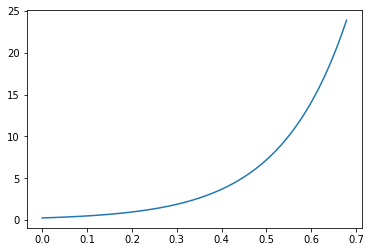

In [90]:
plt.plot(s[0], s[1])

In [91]:
s= pc.impulse_response(pc.ss(A,0.5,0.5,0))
s

/Users/daquintero/opt/anaconda3/lib/python3.8/site-packages/numpy/matrixlib/defmatrix.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  arr = N.array(data, dtype=dtype, copy=copy)


(array([0.        , 0.00685368, 0.01370736, 0.02056104, 0.02741472,
        0.0342684 , 0.04112207, 0.04797575, 0.05482943, 0.06168311,
        0.06853679, 0.07539047, 0.08224415, 0.08909783, 0.09595151,
        0.10280519, 0.10965886, 0.11651254, 0.12336622, 0.1302199 ,
        0.13707358, 0.14392726, 0.15078094, 0.15763462, 0.1644883 ,
        0.17134198, 0.17819566, 0.18504933, 0.19190301, 0.19875669,
        0.20561037, 0.21246405, 0.21931773, 0.22617141, 0.23302509,
        0.23987877, 0.24673245, 0.25358612, 0.2604398 , 0.26729348,
        0.27414716, 0.28100084, 0.28785452, 0.2947082 , 0.30156188,
        0.30841556, 0.31526924, 0.32212292, 0.32897659, 0.33583027,
        0.34268395, 0.34953763, 0.35639131, 0.36324499, 0.37009867,
        0.37695235, 0.38380603, 0.39065971, 0.39751339, 0.40436706,
        0.41122074, 0.41807442, 0.4249281 , 0.43178178, 0.43863546,
        0.44548914, 0.45234282, 0.4591965 , 0.46605018, 0.47290385,
        0.47975753, 0.48661121, 0.49346489, 0.50

So now we've got a state-space representation in the form $\dot{\textbf{x}} = \textbf{Ax}$, where our state variable is $E_0$, nonlinear input $\phi$, $\textbf{B} = \textbf{D} = 0 $, and $\textbf{C} = 0 $

Issues with state space modelling with complex numbers https://dsp.stackexchange.com/questions/53554/how-to-model-state-space-for-complex-valued-system-correctly-in-simulink-matlab

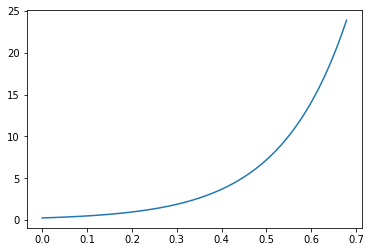

In [92]:
plt.plot(s[0], s[1])

Part of the big question of this solution is related to the nonlinear relationship of $\frac{d \phi(t)}{dt}$

We know phase change is $ \frac{d\phi}{dT} = \frac{2 \pi L}{\lambda_0} \frac{dn}{dT}$

In [7]:
d_phi_d_T = 2 * sy.pi * L  * n.diff(T)/ lambda_0
phi_T = sy.integrate(d_phi_d_T, T)
phi_T.diff(t)

2*pi*L*Derivative(n(t, T), t)/\lambda_0